In [3]:
from src.neural_nets import UnconditionalGenerator, ConditionalGenerator
from src.preprocess import generate_noise, plot_image_grid
import torch

In [4]:
device = 'cuda'
COND_GEN_MODEL_PATH = '/home/dzigen/Desktop/ITMO/sem1/ImgGen/Лабы/lab4/logs/11_cond_fid271_is1_9(best)/best_model.pt'
UNCOND_GEN_MODEL_PATH = '/home/dzigen/Desktop/ITMO/sem1/ImgGen/Лабы/lab4/logs/12_uncond_fid162_is1_4(best)/best_model.pt'

In [5]:
cond_gen = ConditionalGenerator().to(device)
cond_ckpt = torch.load(COND_GEN_MODEL_PATH, map_location=device)
cond_gen.load_state_dict(cond_ckpt)
cond_gen.eval()

ConditionalGenerator(
  (embedding): Embedding(2, 50)
  (linear): Linear(in_features=50, out_features=20, bias=True)
  (model): Sequential(
    (0): ConvTranspose2d(120, 1024, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(1024, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12

In [10]:
num_samples = 10
z = generate_noise(num_samples).to(device)
y = torch.randint(1,2,size=(num_samples, 1)).to(device)

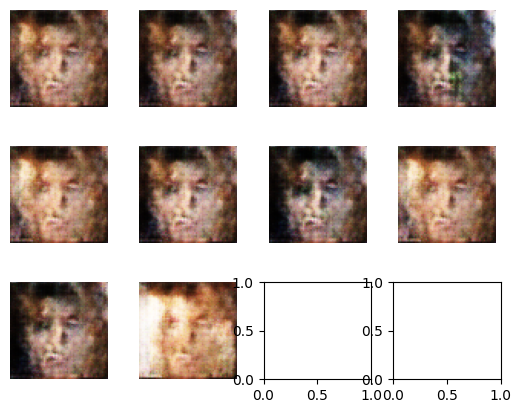

In [12]:
cond_out = cond_gen(z, y)
plot_image_grid(cond_out, None, None)

In [13]:
uncond_gen = UnconditionalGenerator().to(device)
uncond_ckpt = torch.load(UNCOND_GEN_MODEL_PATH, map_location=device)
uncond_gen.load_state_dict(uncond_ckpt)
uncond_gen.eval()

UnconditionalGenerator(
  (model): Sequential(
    (0): ConvTranspose2d(100, 1024, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(1024, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(128, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
   

In [22]:
num_samples = 10
z = generate_noise(num_samples).to(device)

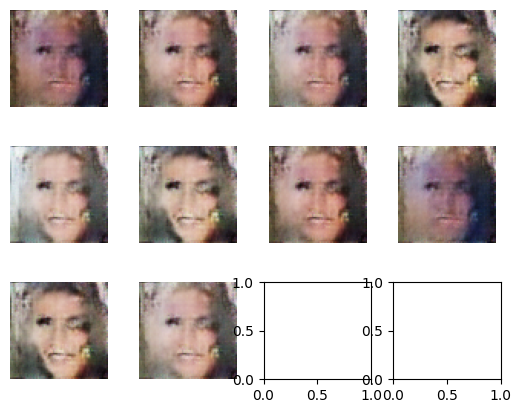

In [23]:
uncond_out = uncond_gen(z)
plot_image_grid(uncond_out, None, None)

### logs

In [24]:
import matplotlib.pyplot as plt
import json
import ast

<Figure size 1000x300 with 0 Axes>

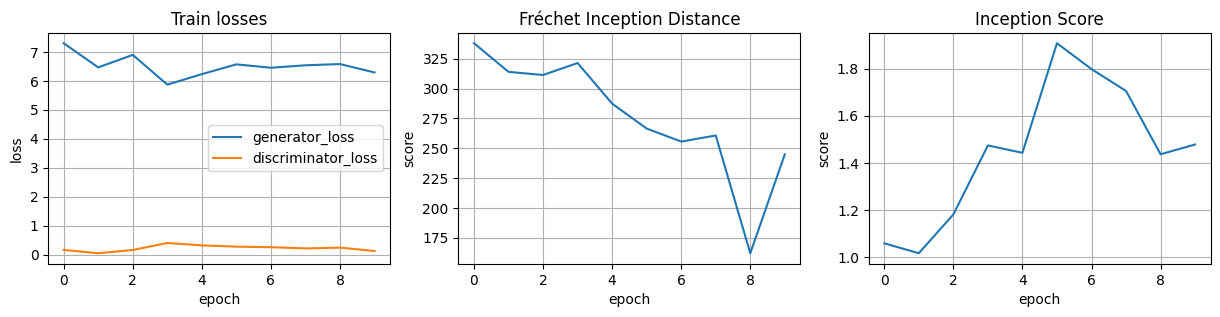

In [26]:
log_path = '/home/dzigen/Desktop/ITMO/sem1/ImgGen/Лабы/lab4/logs/12_uncond_fid162_is1_4(best)/logs.txt'

with open(log_path, 'r', encoding='utf-8') as fd:
    data = list(map(lambda x: x.strip(), fd.readlines()))
epoch_info = [ast.literal_eval(item) for item in data]

plt.figure(figsize=(10,3))

epochs = list(range(len(epoch_info)))
gen_loss = list(map(lambda x: x['gen_train_loss'], epoch_info))
dis_loss = list(map(lambda x: x['dis_train_loss'], epoch_info))
fid_score =  list(map(lambda x: x['fid_score'], epoch_info))
is_score = list(map(lambda x: x['is_score'][0], epoch_info))


fig, axes = plt.subplots(1, 3)
fig.set_figwidth(15)
fig.set_figheight(3)

axes[0].plot(epochs,gen_loss, label='generator_loss')
axes[0].plot(epochs,dis_loss, label='discriminator_loss')
axes[0].set_xlabel('epoch')
axes[0].set_ylabel('loss')
axes[0].set_title("Train losses")
axes[0].legend()
axes[0].grid()


###################

axes[1].plot(epochs, fid_score)
axes[1].set_ylabel('score')
axes[1].set_xlabel('epoch')
axes[1].set_title("Fréchet Inception Distance")
axes[1].grid()

##################

axes[2].plot(epochs, is_score)
axes[2].set_ylabel('score')
axes[2].set_xlabel('epoch')
axes[2].set_title("Inception Score")
axes[2].grid()